In [40]:
#Importing Libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [43]:
#Data preprocessing
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))



Categorical variables: 4
Integer variables: 6
Float variables: 3


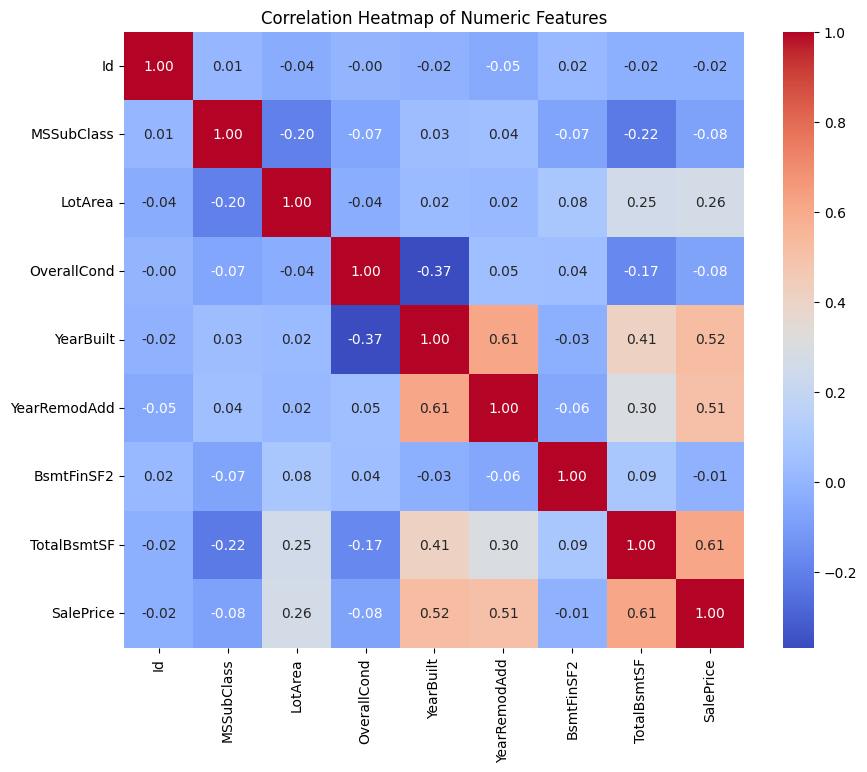

In [44]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_features = dataset.select_dtypes(include=['int64', 'float64'])

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<Axes: >

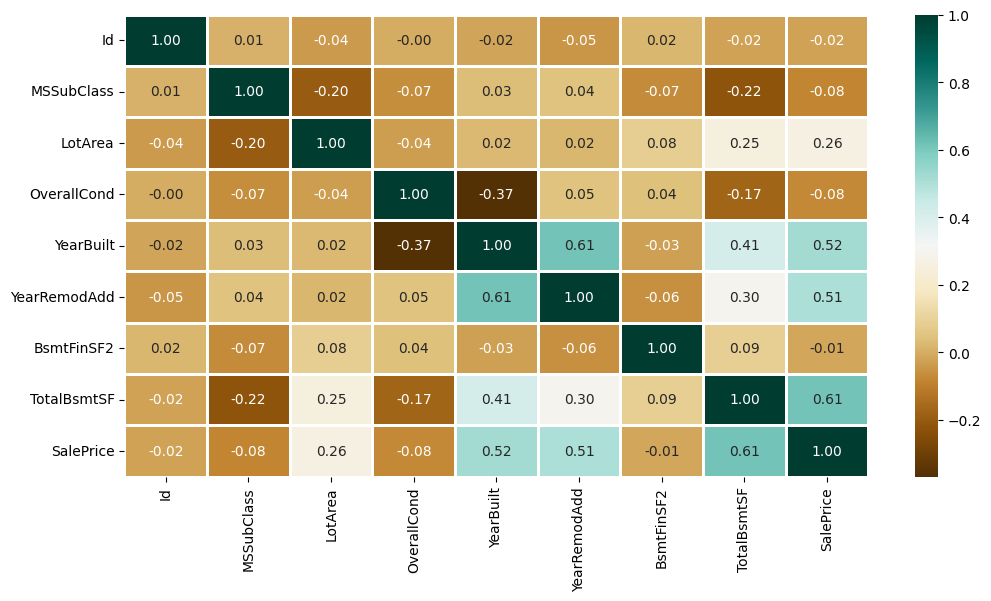

In [45]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)




<Axes: title={'center': 'No. Unique values of Categorical Features'}>

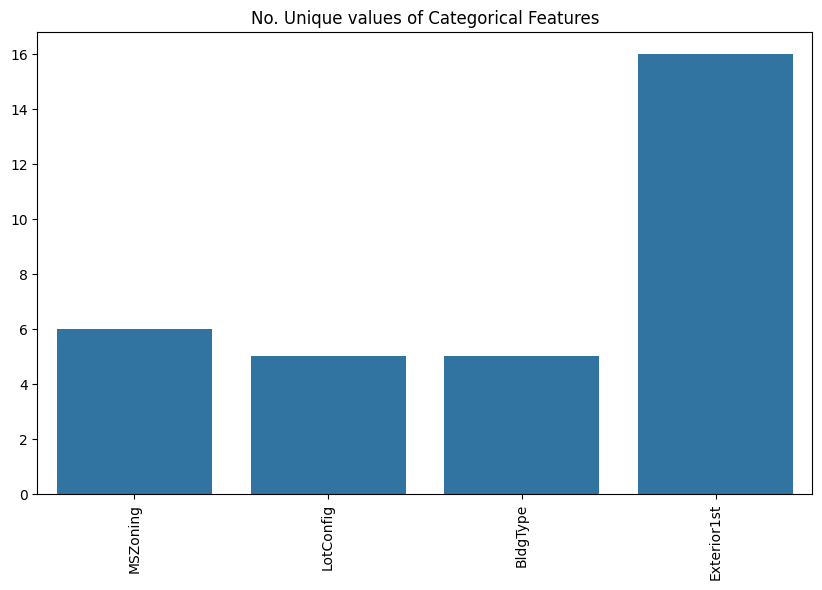

In [46]:
#Unique Value Analysis for Categorical Features
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


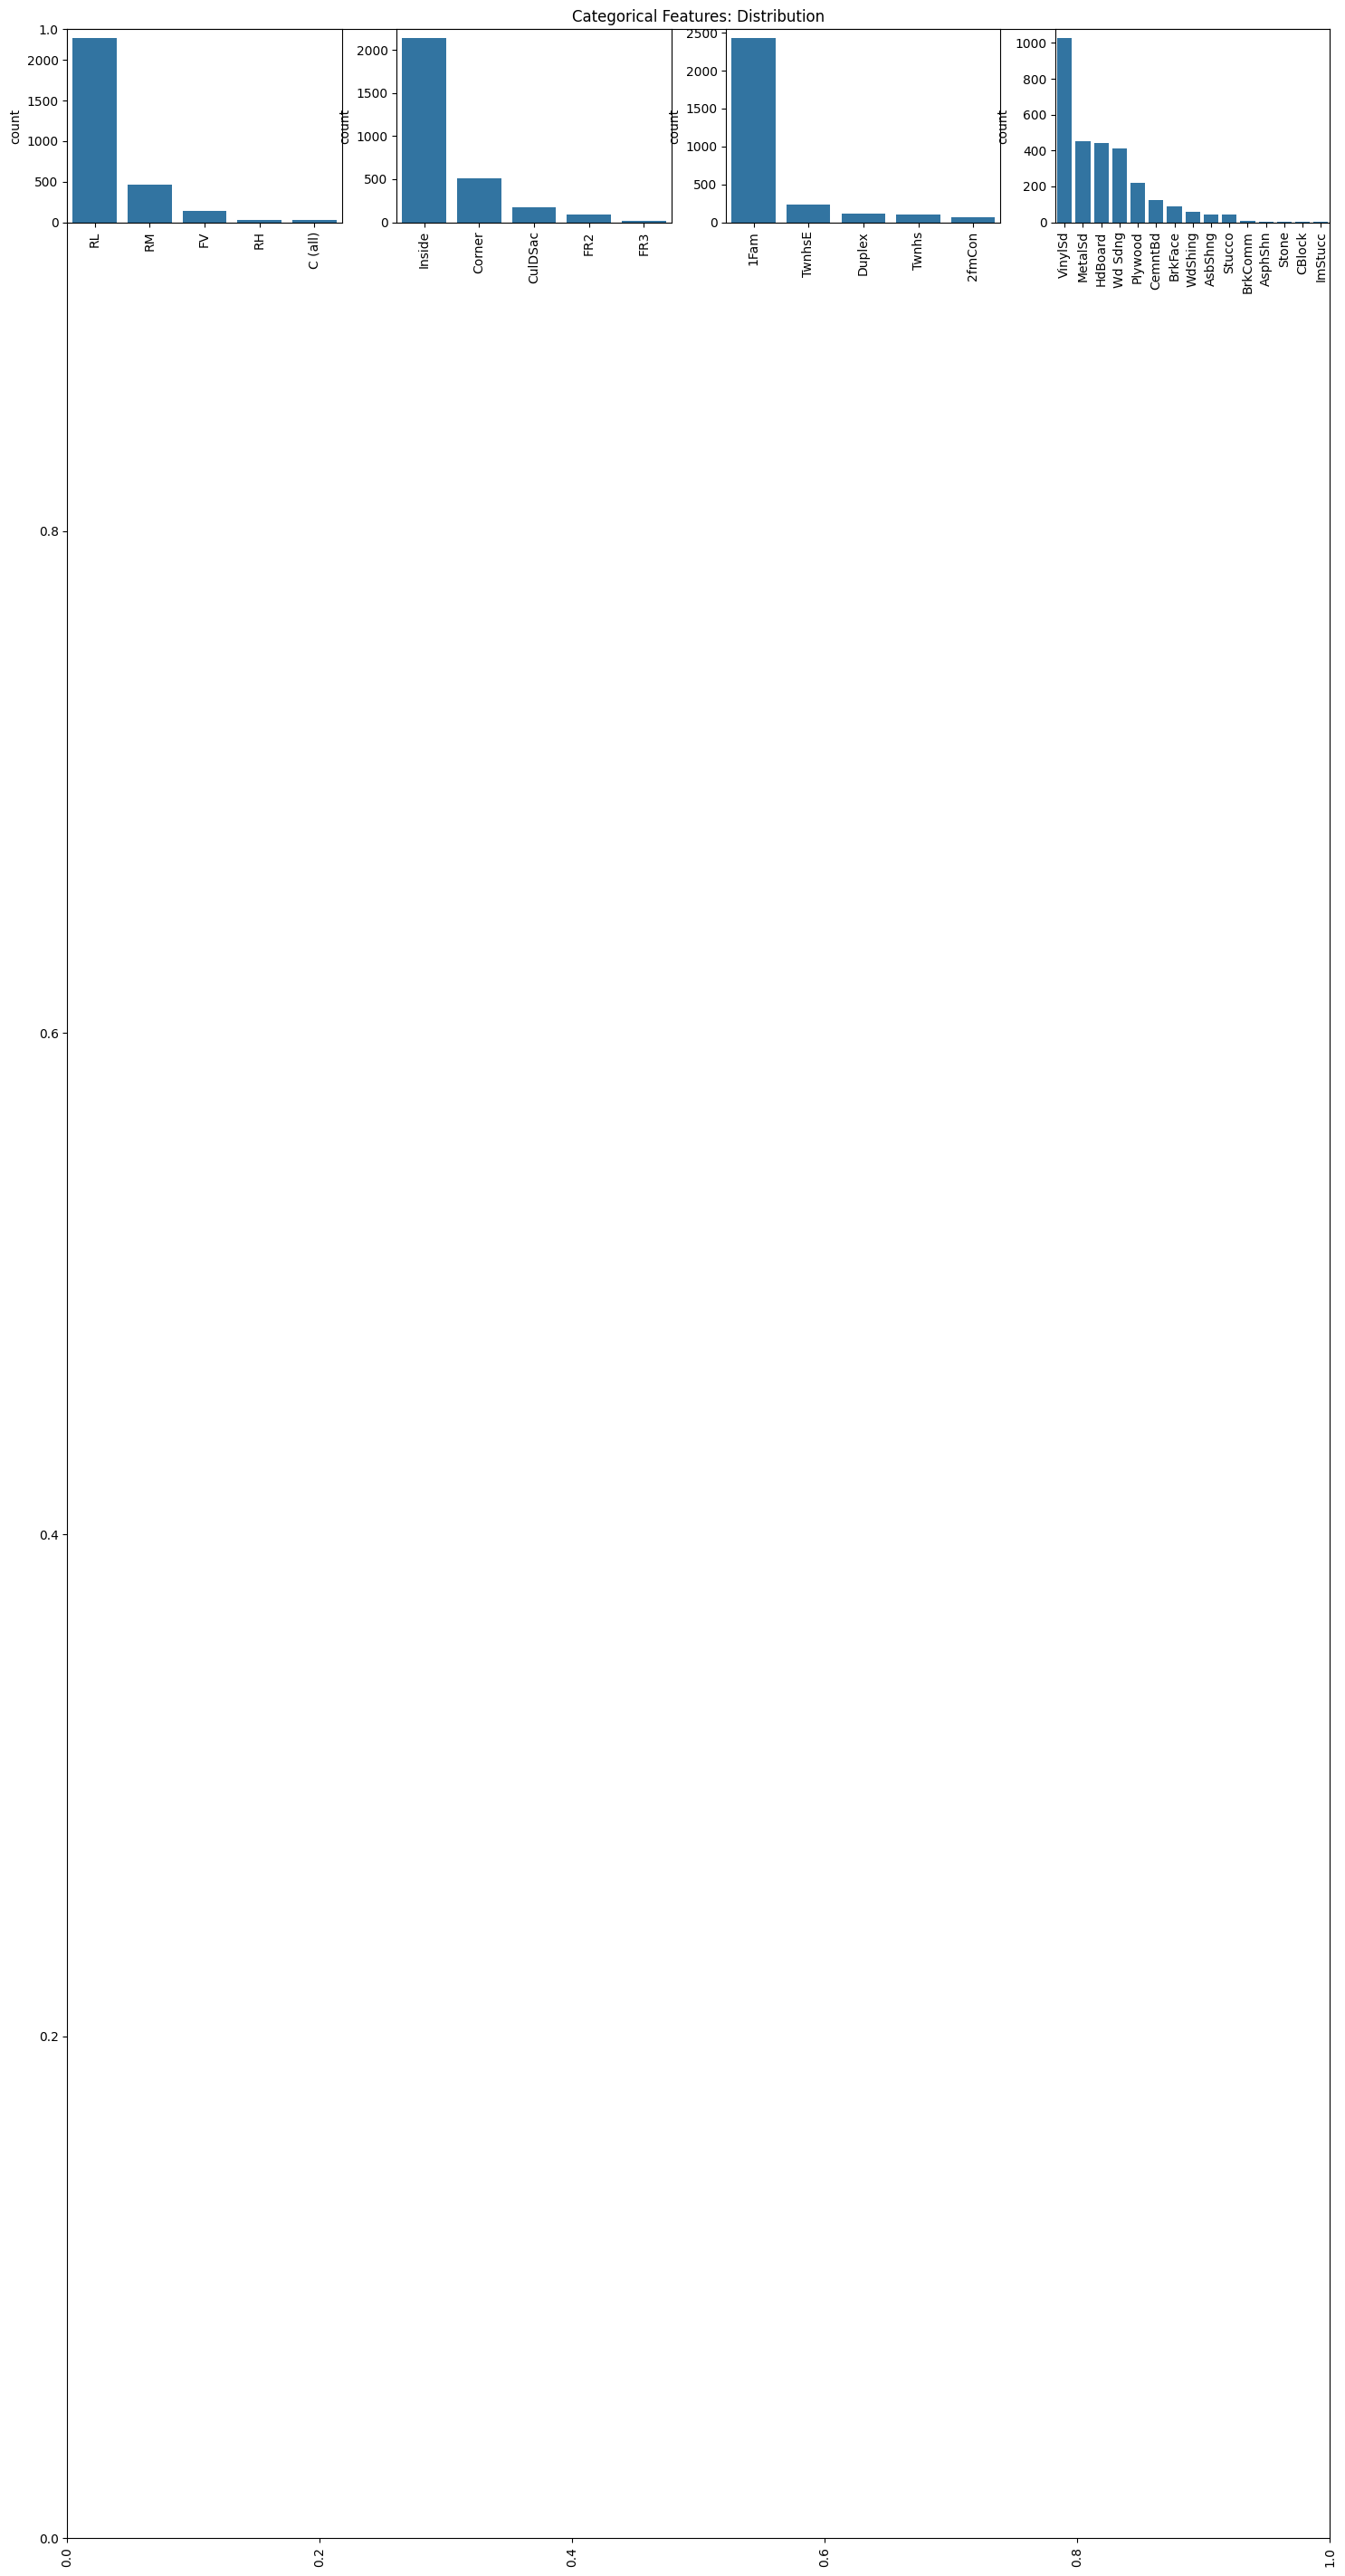

In [47]:
#Categorical Feature Distribution Analysis
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [48]:
 # Data Cleaning within the Data Preprocessing stage.
 dataset.drop(['Id'],
             axis=1,
             inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 



In [ ]:
#Data Cleaning for  Handling Missing Values.
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 


In [ ]:
# Removing Rows with Missing Values
new_dataset = dataset.dropna()


In [ ]:
#check for any remaining missing values 
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
#identifying categorical variables in the dataset
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
#One-Hot Encoding of Categorical Features
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

# Combine the data with the one-hot encoded columns
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)



In [ ]:
#splitting the dataset
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [50]:
#Support Vector Regression (SVR) model to train 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [ ]:
#Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


np.float64(0.18641922454406548)

In [52]:
# Linear Regression to predict house prices
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599896


In [53]:
# This code is contributed by @amartajisce

from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score




ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=0)

# Train the model
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=0)

In [34]:
# Predict on validation data
Y_pred = model.predict(X_valid)


In [54]:
# Importing necessary libraries for data manipulation, visualization, and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from the Excel file into a pandas DataFrame
dataset = pd.read_excel("HousePricePrediction.xlsx")

# Displaying the first 5 records of the dataset to get an overview of the data structure
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [36]:
# Define the target year for prediction
target_year = 2000

# Filter validation data for houses built in the target year
X_year = X_valid[X_valid['YearBuilt'] == target_year]

# Check if there are any records for this year
if not X_year.empty:
    # Predict house prices for houses built in the target year
    Y_year_pred = model.predict(X_year)
    
    # Display predictions
    print(f"Predicted house prices for houses built in {target_year}:")
    print(Y_year_pred)
else:
    print(f"No houses found in the dataset for the year {target_year}.")


Predicted house prices for houses built in 2000:
[190850.36969863 225666.85876712 182543.95887671 221992.91223973
 252584.99072603 183271.69031507]
